In [1]:
import numpy as np
import pandas as pd
import mglearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
data = pd.read_csv('data1.csv', encoding='cp949')

In [2]:
features = ['평균기온', '최저기온', '최고기온', '일강수량(mm)', '최대 풍속(m/s)', '평균 풍속(m/s)', '최소 상대습도(%)', 
            '평균 상대습도(%)', '평균 현지기압(hPa)', '평균 해면기압(hPa)', '합계 일조시간(hr)', '합계 일사량(MJ/m2)', 
            '평균 전운량(1/10)', '평균 지면온도', '1일전 모기 개체수', '2일전 모기 개체수', '3일전 모기 개체수']
target = '모기 개체수'

기본 분석

In [3]:
X = data[features]
y = data[target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
y_train_hat = lr.predict(X_train)
y_test_hat = lr.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

('performance for TRAIN--------')
print('train MAE : ', mean_absolute_error(y_train, y_train_hat))
print('train RMSE : ', mean_squared_error(y_train, y_train_hat)**0.5)
print('train R_square : ', r2_score(y_train, y_train_hat))

print('performance for TEST--------')
print('test MAE : ', mean_absolute_error(y_test, y_test_hat))
print('test RMSE : ', mean_squared_error(y_test, y_test_hat)**0.5)
print('test R_square : ', r2_score(y_test, y_test_hat))

train MAE :  556.7858009174462
train RMSE :  1226.7401379221349
train R_square :  0.675742035888545
performance for TEST--------
test MAE :  554.8694584593089
test RMSE :  1119.357961312162
test R_square :  0.7281379242755726


In [8]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [9]:
model = sm.OLS(y_train, X_train_sm).fit()

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 모기 개체수   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 28 May 2024   Prob (F-statistic):          4.15e-283
Time:                        18:55:20   Log-Likelihood:                -10544.
No. Observations:                1236   AIC:                         2.112e+04
Df Residuals:                    1218   BIC:                         2.122e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4398.3058   8998.307     -0.489

연도에 따른 분석 (3년씩)

In [11]:
data = pd.read_csv('data1.csv', encoding='cp949')

In [12]:
data['일시'] = pd.to_datetime(data['일시'])
data['연도'] = data['일시'].dt.year

In [13]:
start_year = data['연도'].min()
end_year = data['연도'].max()

In [14]:
train_mae_list, train_rmse_list, train_r2_list = [], [], []
test_mae_list, test_rmse_list, test_r2_list = [], [], []
years_list = []

In [15]:
for year in range(start_year, end_year + 1, 3):
    subset = data[(data['연도'] >= year) & (data['연도'] < year + 3)]
    if len(subset) == 0:
        continue

    X = subset[features]
    y = subset[target]

    # 데이터를 학습 및 테스트 세트로 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # 선형 회귀 모델 생성 및 학습
    lr = LinearRegression()
    lr.fit(X_train, y_train)  # 학습

    # 예측 및 성능 평가
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)

    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mae_list.append(train_mae)
    train_rmse_list.append(train_rmse)
    train_r2_list.append(train_r2)
    test_mae_list.append(test_mae)
    test_rmse_list.append(test_rmse)
    test_r2_list.append(test_r2)
    years_list.append(f"{year}-{year + 2}")

c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

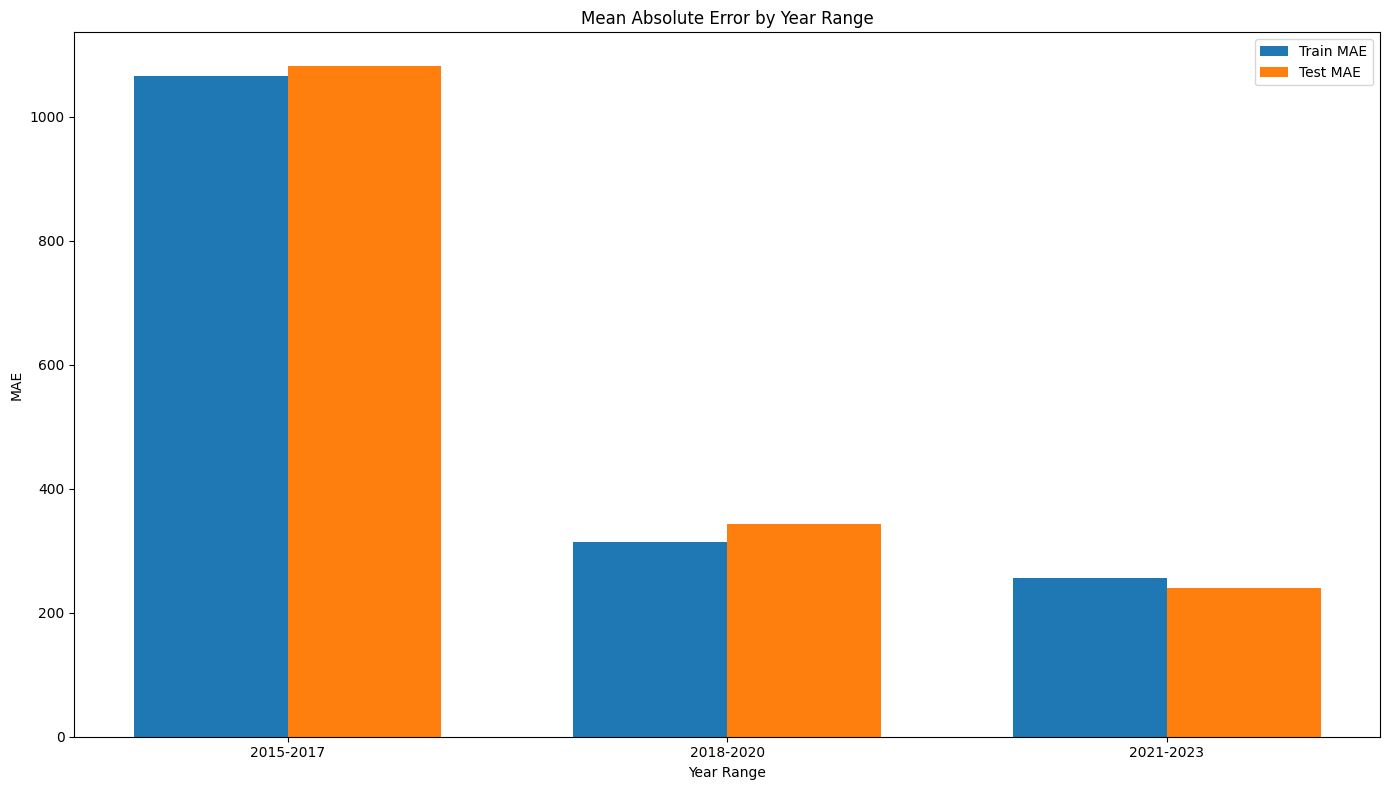

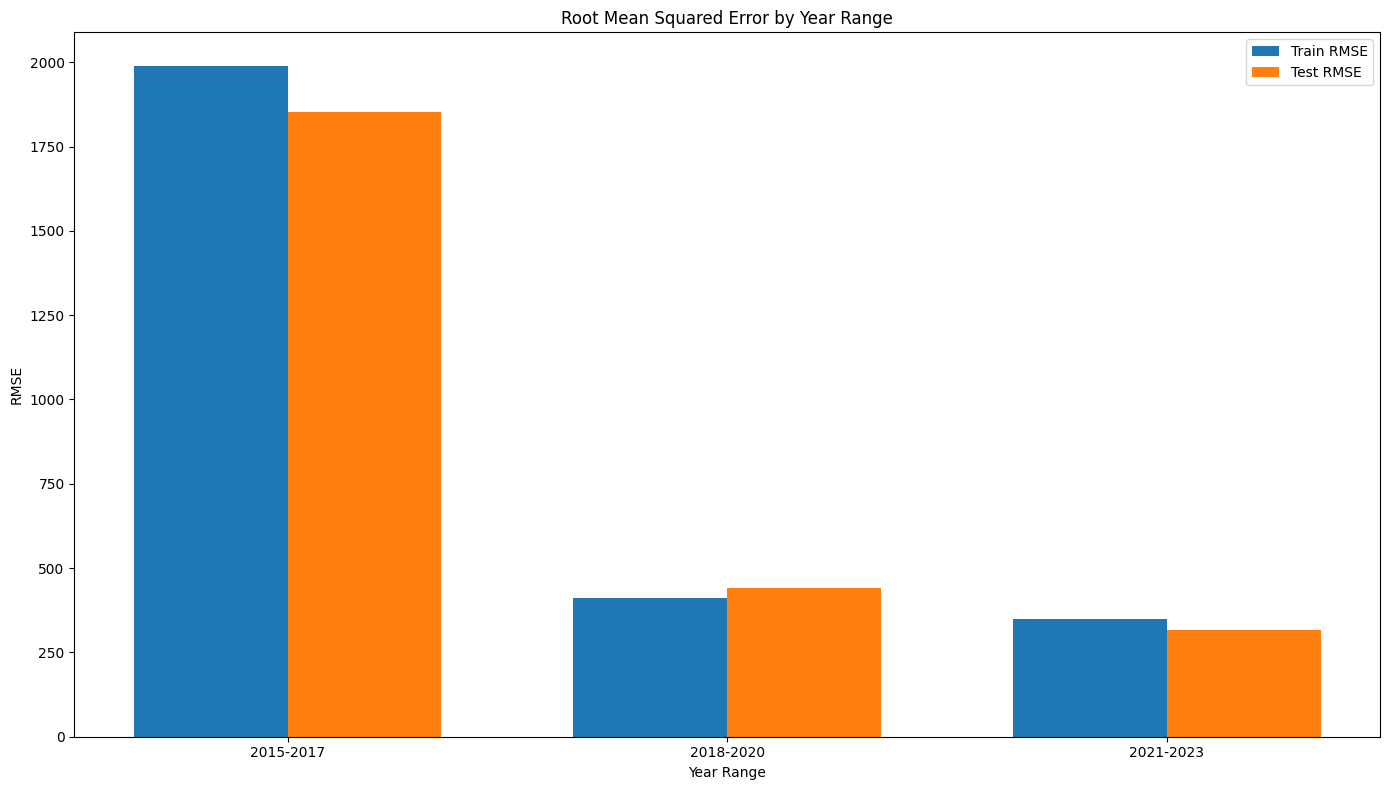

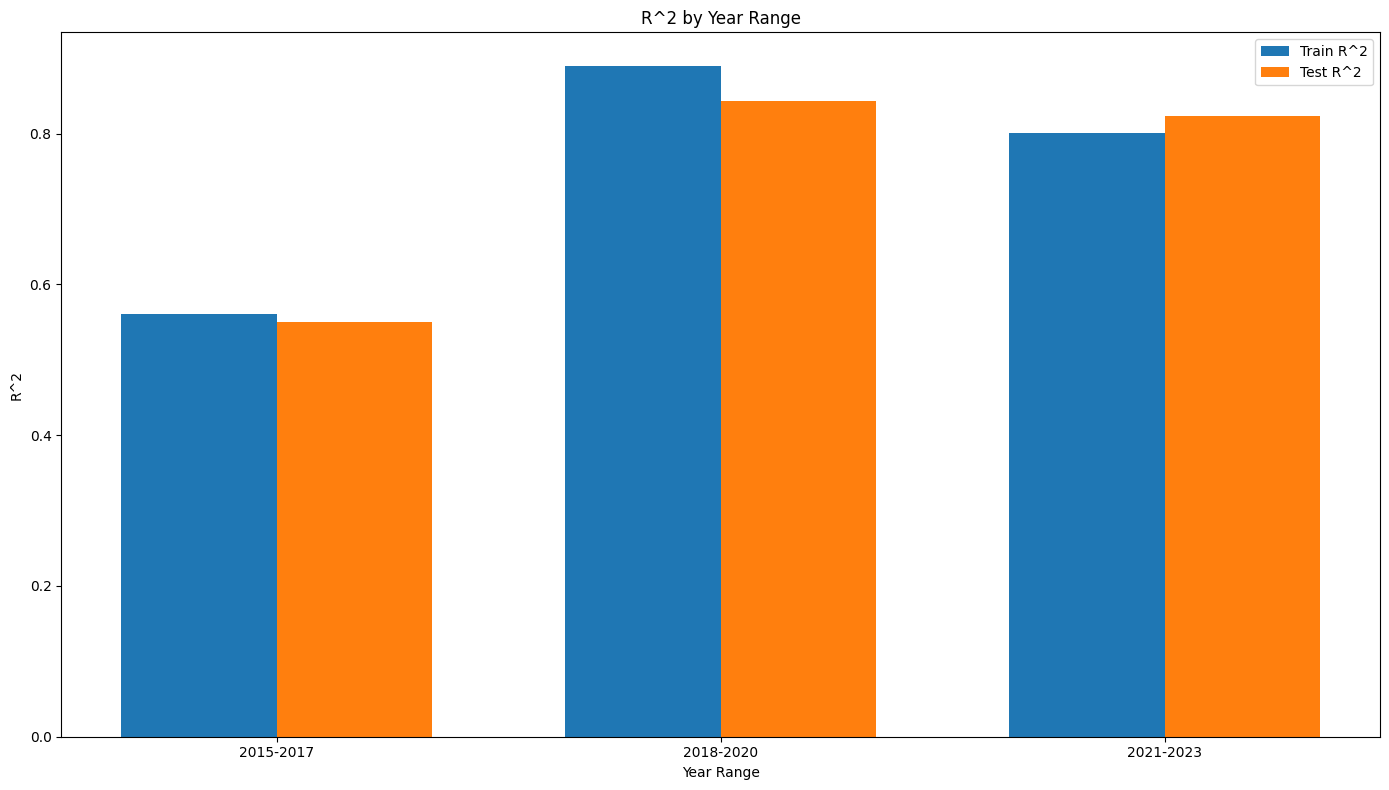

In [16]:
x = np.arange(len(years_list))
width = 0.35

fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))

# MAE
ax1.bar(x - width/2, train_mae_list, width, label='Train MAE')
ax1.bar(x + width/2, test_mae_list, width, label='Test MAE')
ax1.set_xlabel('Year Range')
ax1.set_ylabel('MAE')
ax1.set_title('Mean Absolute Error by Year Range')
ax1.set_xticks(x)
ax1.set_xticklabels(years_list)
ax1.legend()

plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(1, 1, figsize=(14, 8))

# RMSE
ax2.bar(x - width/2, train_rmse_list, width, label='Train RMSE')
ax2.bar(x + width/2, test_rmse_list, width, label='Test RMSE')
ax2.set_xlabel('Year Range')
ax2.set_ylabel('RMSE')
ax2.set_title('Root Mean Squared Error by Year Range')
ax2.set_xticks(x)
ax2.set_xticklabels(years_list)
ax2.legend()

plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots(1, 1, figsize=(14, 8))

# R^2
ax3.bar(x - width/2, train_r2_list, width, label='Train R^2')
ax3.bar(x + width/2, test_r2_list, width, label='Test R^2')
ax3.set_xlabel('Year Range')
ax3.set_ylabel('R^2')
ax3.set_title('R^2 by Year Range')
ax3.set_xticks(x)
ax3.set_xticklabels(years_list)
ax3.legend()

plt.tight_layout()
plt.show()

In [17]:
X = subset[features]
y = subset[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

연도별 feature의 데이터들을 각각 평균내서 각각 대입

ex: 2015,2016,2017의 feature들의 평균들을 2015,2016,2017로 제작된 모델에 대입

In [20]:
# 각 연도별로 예측값 도출
for idx, year in enumerate(range(start_year, end_year + 1, 3)):
    # 해당 연도 범위에 해당하는 데이터 추출
    subset = data[(data['연도'] >= year) & (data['연도'] < year + 3)]
    if len(subset) == 0:
        continue

    # 해당 연도 범위의 평균값 계산
    mean_values = subset[features].mean()

    # 해당 연도의 모델 사용하여 예측값 도출
    y_pred = lr.predict(mean_values.values.reshape(1, -1))

    print(f"Year Range: {years_list[idx]}")
    print(f"Predicted Mosquito Count: {y_pred[0]}")
    print("-----------------------------")


Year Range: 2015-2017
Predicted Mosquito Count: 4053.9828660943367
-----------------------------
Year Range: 2018-2020
Predicted Mosquito Count: 2470.430404653269
-----------------------------
Year Range: 2021-2023
Predicted Mosquito Count: 1976.3493672590394
-----------------------------


c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


연도별 feature의 데이터들을 합쳐서 평균내서 대입

ex: 2015,2016,2017, ... 모든 feature들의 평균들을 각각의 모델에 대입

In [21]:
# 연도별 평균값 계산
mean_values_by_year = data.groupby('연도')[features].mean()

# 각 연도별로 예측값 도출
for idx, year in enumerate(range(start_year, end_year + 1, 3)):
    subset = data[(data['연도'] >= year) & (data['연도'] < year + 3)]
    if len(subset) == 0:
        continue

    # 해당 연도의 평균값으로 데이터 프레임 대체
    random_data = mean_values_by_year.loc[year].to_frame().T

    # 해당 연도의 모델 사용하여 예측값 도출
    y_pred = lr.predict(random_data)

    print(f"Year Range: {years_list[idx]}")
    print(f"Predicted Mosquito Count: {y_pred[0]}")
    print("-----------------------------")


Year Range: 2015-2017
Predicted Mosquito Count: 4149.3562209948195
-----------------------------
Year Range: 2018-2020
Predicted Mosquito Count: 2522.380281838119
-----------------------------
Year Range: 2021-2023
Predicted Mosquito Count: 2355.2283272805143
-----------------------------


성수기(6,7,8월) vs 비수기(4,5,9,10월)

In [22]:
data = pd.read_csv('data1.csv', encoding='cp949')

In [23]:
data['일시'] = pd.to_datetime(data['일시'])
data['월'] = data['일시'].dt.month
high_season = data[(data['월'] >= 6) & (data['월'] <= 8)]
low_season = data[(data['월'] == 4) | (data['월'] == 5) | (data['월'] == 9) | (data['월'] == 10)]

In [24]:
X_high = high_season[features]
y_high = high_season[target]
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, random_state=0)

In [25]:
X_low = low_season[features]
y_low = low_season[target]
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=42)


In [26]:
lr_high = LinearRegression()
lr_high.fit(X_train_high, y_train_high)

LinearRegression()

In [27]:
lr_low = LinearRegression()
lr_low.fit(X_train_low, y_train_low)

LinearRegression()

In [28]:
y_pred_high = lr_high.predict(X_test_high)

In [29]:
y_pred_low = lr_low.predict(X_test_low)

모든 feature 값의 평균을 각각의 모델에 

(같은 값이 대입되게 됨)

In [30]:
mean_values_high = X_high.mean().values.reshape(1, -1)
y_pred_high_mean = lr_high.predict(mean_values_high)
print("High Season 평균값을 사용한 예측 결과:", y_pred_high_mean[0])

mean_values_low = X_low.mean().values.reshape(1, -1)
y_pred_low_mean = lr_low.predict(mean_values_low)
print("Low Season 평균값을 사용한 예측 결과:", y_pred_low_mean[0])

High Season 평균값을 사용한 예측 결과: 3662.7179220096914
Low Season 평균값을 사용한 예측 결과: 2234.8640639800524


c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\songs\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
